In [44]:
import pandas as pd
import datetime as dt
import seaborn as sns

In [79]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')

In [112]:
df = pd.read_csv("../data/청년실업률.csv", encoding="CP949")

In [113]:
df = df.transpose()

In [114]:
df = df.reset_index()

In [115]:
df = df.iloc[1:]

In [116]:
df.columns=["분기","실업률"]

In [117]:
df

,분기,실업률
1,1999 3/4,10.4
2,1999 4/4,9.2
3,2000 1/4,10.1
4,2000 2/4,7.6
5,2000 3/4,7.3
...,...,...
81,2019 3/4,8.1
82,2019 4/4,7.1
83,2020 1/4,8.8
84,2020 2/4,10.1


In [118]:
for i in range(len(df)):
    if "1/4" in df['분기'].iloc[i]:
        df['분기'].iloc[i] = df['분기'].iloc[i].replace("1/4","-03-01")
    elif "2/4" in df['분기'].iloc[i]:
        df['분기'].iloc[i] = df['분기'].iloc[i].replace("2/4","-06-01")
    elif "3/4" in df['분기'].iloc[i]:
        df['분기'].iloc[i] = df['분기'].iloc[i].replace("3/4","-09-01")
    else:
        df['분기'].iloc[i] = df['분기'].iloc[i].replace("4/4","-12-01")

In [119]:
df

,분기,실업률
1,1999 -09-01,10.4
2,1999 -12-01,9.2
3,2000 -03-01,10.1
4,2000 -06-01,7.6
5,2000 -09-01,7.3
...,...,...
81,2019 -09-01,8.1
82,2019 -12-01,7.1
83,2020 -03-01,8.8
84,2020 -06-01,10.1


In [120]:
for i in range(len(df)):
    df['분기'].iloc[i] = df['분기'].iloc[i].replace(" ","")
df

,분기,실업률
1,1999-09-01,10.4
2,1999-12-01,9.2
3,2000-03-01,10.1
4,2000-06-01,7.6
5,2000-09-01,7.3
...,...,...
81,2019-09-01,8.1
82,2019-12-01,7.1
83,2020-03-01,8.8
84,2020-06-01,10.1


In [121]:
df['분기'] = pd.to_datetime(df['분기'], format = '%Y-%m-%d')

In [122]:
df

,분기,실업률
1,1999-09-01,10.4
2,1999-12-01,9.2
3,2000-03-01,10.1
4,2000-06-01,7.6
5,2000-09-01,7.3
...,...,...
81,2019-09-01,8.1
82,2019-12-01,7.1
83,2020-03-01,8.8
84,2020-06-01,10.1


<Figure size 864x576 with 0 Axes>

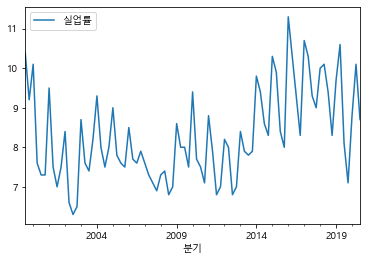

In [128]:
plt.figure(figsize=(12,8))
df.plot.line(0)
plt.show()

In [134]:
df=df.iloc[78:]

<Figure size 864x576 with 0 Axes>

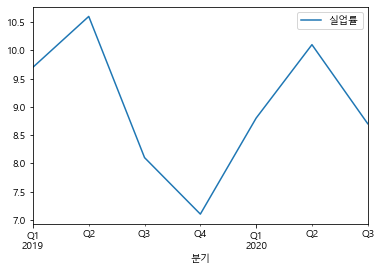

In [135]:
plt.figure(figsize=(12,8))
df.plot.line(0)
plt.show()

In [151]:
df = pd.read_csv("../data/대학생_등록금_마련_방법_대학생__20201128151020.csv", encoding="cp949")
df

,Unnamed: 0,마련 방법,Unnamed: 2
0,2016,부모님(가족) 도움,58.2
1,2018,부모님(가족) 도움,58.2
2,2020,부모님(가족) 도움,63.3
3,2016,대출,10.5
4,2018,대출,8.0
5,2020,대출,7.0
6,2016,스스로 마련,5.2
7,2018,스스로 마련,5.5
8,2020,스스로 마련,4.4
9,2016,장학금,26.0


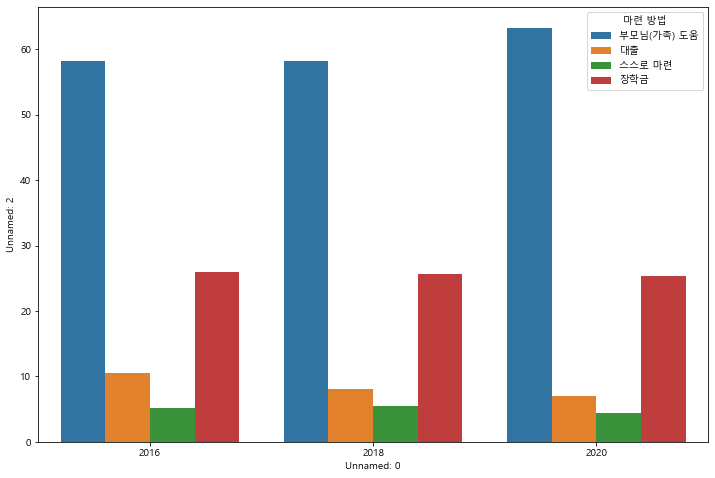

In [153]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="Unnamed: 0", y="Unnamed: 2", hue="마련 방법")

- 장학금으로 등록금을 마련하는 비중은 점차 낮아지고 부모님 가족의 도움을 받는 경우가 늘어남

In [334]:
df = pd.read_csv("../data/가구당_월평균_가계수지__전국_2인이상__20201128153421.csv", encoding="cp949")
df

,시점,전체가구,전체가구.1,전체가구.2,전체가구.3,전체가구.4,전체가구.5,전체가구.6,전체가구.7,전체가구.8,...,전체가구.19,전체가구.20,전체가구.21,전체가구.22,전체가구.23,전체가구.24,전체가구.25,전체가구.26,전체가구.27,전체가구.28
0,시점,가구원수 (명),가구주연령 (세),가구분포 (%),소득,경상소득,근로소득,사업소득,재산소득,이전소득,...,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스,비소비지출,처분가능소득,흑자액,흑자율,평균소비성향
1,2019 1/4,3.04,52.17,100,5168179,5084463,3465641,917990,36521,664311,...,143944,243162,358438,393718,245524,1086041,4082137,1021300,25,75
2,2019 1/2,3.03,52.19,100,5032390,4969763,3399746,986861,38040,545117,...,150251,220143,238535,408270,252244,993944,4038446,1203017,29.8,70.2
3,2019 3/4,3.03,52.05,100,5222363,5162171,3515495,1000602,33787,612287,...,152177,229064,341887,419005,237165,1094462,4127901,1141591,27.7,72.3
4,2020,3.03,52.08,100,5069485,5001349,3418864,1047556,26443,508487,...,158385,191314,218862,406624,249574,988852,4080633,1172432,28.7,71.3
5,2020 1/4,3.02,52.54,100,5358324,5207820,3529375,937872,44717,695856,...,144606,180885,264068,349689,253127,1067427,4290897,1412983,32.9,67.1
6,2020 1/2,3.02,52.52,100,5271568,5181152,3220216,941926,33598,985412,...,145104,173985,168431,387847,256779,970718,4300850,1389135,32.3,67.7
7,2020 3/4,3.02,52.47,100,5305136,5224892,3476747,990889,40043,717212,...,154056,164679,295327,391510,242244,1044161,4260975,1316091,30.9,69.1


In [335]:
df.columns = df.iloc[0]

In [336]:
df = df.iloc[1:]
df

,시점,가구원수 (명),가구주연령 (세),가구분포 (%),소득,경상소득,근로소득,사업소득,재산소득,이전소득,...,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스,비소비지출,처분가능소득,흑자액,흑자율,평균소비성향
1,2019 1/4,3.04,52.17,100,5168179,5084463,3465641,917990,36521,664311,...,143944,243162,358438,393718,245524,1086041,4082137,1021300,25,75
2,2019 1/2,3.03,52.19,100,5032390,4969763,3399746,986861,38040,545117,...,150251,220143,238535,408270,252244,993944,4038446,1203017,29.8,70.2
3,2019 3/4,3.03,52.05,100,5222363,5162171,3515495,1000602,33787,612287,...,152177,229064,341887,419005,237165,1094462,4127901,1141591,27.7,72.3
4,2020,3.03,52.08,100,5069485,5001349,3418864,1047556,26443,508487,...,158385,191314,218862,406624,249574,988852,4080633,1172432,28.7,71.3
5,2020 1/4,3.02,52.54,100,5358324,5207820,3529375,937872,44717,695856,...,144606,180885,264068,349689,253127,1067427,4290897,1412983,32.9,67.1
6,2020 1/2,3.02,52.52,100,5271568,5181152,3220216,941926,33598,985412,...,145104,173985,168431,387847,256779,970718,4300850,1389135,32.3,67.7
7,2020 3/4,3.02,52.47,100,5305136,5224892,3476747,990889,40043,717212,...,154056,164679,295327,391510,242244,1044161,4260975,1316091,30.9,69.1


In [337]:
df = df.reset_index()
del df["index"]
df

,시점,가구원수 (명),가구주연령 (세),가구분포 (%),소득,경상소득,근로소득,사업소득,재산소득,이전소득,...,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스,비소비지출,처분가능소득,흑자액,흑자율,평균소비성향
0,2019 1/4,3.04,52.17,100,5168179,5084463,3465641,917990,36521,664311,...,143944,243162,358438,393718,245524,1086041,4082137,1021300,25,75
1,2019 1/2,3.03,52.19,100,5032390,4969763,3399746,986861,38040,545117,...,150251,220143,238535,408270,252244,993944,4038446,1203017,29.8,70.2
2,2019 3/4,3.03,52.05,100,5222363,5162171,3515495,1000602,33787,612287,...,152177,229064,341887,419005,237165,1094462,4127901,1141591,27.7,72.3
3,2020,3.03,52.08,100,5069485,5001349,3418864,1047556,26443,508487,...,158385,191314,218862,406624,249574,988852,4080633,1172432,28.7,71.3
4,2020 1/4,3.02,52.54,100,5358324,5207820,3529375,937872,44717,695856,...,144606,180885,264068,349689,253127,1067427,4290897,1412983,32.9,67.1
5,2020 1/2,3.02,52.52,100,5271568,5181152,3220216,941926,33598,985412,...,145104,173985,168431,387847,256779,970718,4300850,1389135,32.3,67.7
6,2020 3/4,3.02,52.47,100,5305136,5224892,3476747,990889,40043,717212,...,154056,164679,295327,391510,242244,1044161,4260975,1316091,30.9,69.1


In [338]:
df

,시점,가구원수 (명),가구주연령 (세),가구분포 (%),소득,경상소득,근로소득,사업소득,재산소득,이전소득,...,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스,비소비지출,처분가능소득,흑자액,흑자율,평균소비성향
0,2019 1/4,3.04,52.17,100,5168179,5084463,3465641,917990,36521,664311,...,143944,243162,358438,393718,245524,1086041,4082137,1021300,25,75
1,2019 1/2,3.03,52.19,100,5032390,4969763,3399746,986861,38040,545117,...,150251,220143,238535,408270,252244,993944,4038446,1203017,29.8,70.2
2,2019 3/4,3.03,52.05,100,5222363,5162171,3515495,1000602,33787,612287,...,152177,229064,341887,419005,237165,1094462,4127901,1141591,27.7,72.3
3,2020,3.03,52.08,100,5069485,5001349,3418864,1047556,26443,508487,...,158385,191314,218862,406624,249574,988852,4080633,1172432,28.7,71.3
4,2020 1/4,3.02,52.54,100,5358324,5207820,3529375,937872,44717,695856,...,144606,180885,264068,349689,253127,1067427,4290897,1412983,32.9,67.1
5,2020 1/2,3.02,52.52,100,5271568,5181152,3220216,941926,33598,985412,...,145104,173985,168431,387847,256779,970718,4300850,1389135,32.3,67.7
6,2020 3/4,3.02,52.47,100,5305136,5224892,3476747,990889,40043,717212,...,154056,164679,295327,391510,242244,1044161,4260975,1316091,30.9,69.1


In [339]:
df = df.rename({'시점':'분기'}, axis=1)

In [340]:
df

,분기,가구원수 (명),가구주연령 (세),가구분포 (%),소득,경상소득,근로소득,사업소득,재산소득,이전소득,...,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스,비소비지출,처분가능소득,흑자액,흑자율,평균소비성향
0,2019 1/4,3.04,52.17,100,5168179,5084463,3465641,917990,36521,664311,...,143944,243162,358438,393718,245524,1086041,4082137,1021300,25,75
1,2019 1/2,3.03,52.19,100,5032390,4969763,3399746,986861,38040,545117,...,150251,220143,238535,408270,252244,993944,4038446,1203017,29.8,70.2
2,2019 3/4,3.03,52.05,100,5222363,5162171,3515495,1000602,33787,612287,...,152177,229064,341887,419005,237165,1094462,4127901,1141591,27.7,72.3
3,2020,3.03,52.08,100,5069485,5001349,3418864,1047556,26443,508487,...,158385,191314,218862,406624,249574,988852,4080633,1172432,28.7,71.3
4,2020 1/4,3.02,52.54,100,5358324,5207820,3529375,937872,44717,695856,...,144606,180885,264068,349689,253127,1067427,4290897,1412983,32.9,67.1
5,2020 1/2,3.02,52.52,100,5271568,5181152,3220216,941926,33598,985412,...,145104,173985,168431,387847,256779,970718,4300850,1389135,32.3,67.7
6,2020 3/4,3.02,52.47,100,5305136,5224892,3476747,990889,40043,717212,...,154056,164679,295327,391510,242244,1044161,4260975,1316091,30.9,69.1


In [341]:
df.replace("2019 1/4","2019-03-01", inplace=True)
df.replace("2019 1/2","2019-06-01", inplace=True)
df.replace("2019 3/4","2019-09-01", inplace=True)
df.replace("2020","2020-03-01", inplace=True)
df.replace("2020 1/2","2020-06-01", inplace=True)
df.replace("2020 3/4","2020-09-01", inplace=True)
df

,분기,가구원수 (명),가구주연령 (세),가구분포 (%),소득,경상소득,근로소득,사업소득,재산소득,이전소득,...,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스,비소비지출,처분가능소득,흑자액,흑자율,평균소비성향
0,2019-03-01,3.04,52.17,100,5168179,5084463,3465641,917990,36521,664311,...,143944,243162,358438,393718,245524,1086041,4082137,1021300,25,75
1,2019-06-01,3.03,52.19,100,5032390,4969763,3399746,986861,38040,545117,...,150251,220143,238535,408270,252244,993944,4038446,1203017,29.8,70.2
2,2019-09-01,3.03,52.05,100,5222363,5162171,3515495,1000602,33787,612287,...,152177,229064,341887,419005,237165,1094462,4127901,1141591,27.7,72.3
3,2020,3.03,52.08,100,5069485,5001349,3418864,1047556,26443,508487,...,158385,191314,218862,406624,249574,988852,4080633,1172432,28.7,71.3
4,2020 1/4,3.02,52.54,100,5358324,5207820,3529375,937872,44717,695856,...,144606,180885,264068,349689,253127,1067427,4290897,1412983,32.9,67.1
5,2020-06-01,3.02,52.52,100,5271568,5181152,3220216,941926,33598,985412,...,145104,173985,168431,387847,256779,970718,4300850,1389135,32.3,67.7
6,2020-09-01,3.02,52.47,100,5305136,5224892,3476747,990889,40043,717212,...,154056,164679,295327,391510,242244,1044161,4260975,1316091,30.9,69.1


In [342]:
df.replace("2020","2020-03-01", inplace=True)
df.replace("2020 1/4","2020-03-01", inplace=True)

In [347]:
df['분기'].iloc[3] = "2020-03-01"
df

,분기,가구원수 (명),가구주연령 (세),가구분포 (%),소득,경상소득,근로소득,사업소득,재산소득,이전소득,...,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스,비소비지출,처분가능소득,흑자액,흑자율,평균소비성향
0,2019-03-01,3.04,52.17,100,5168179,5084463,3465641,917990,36521,664311,...,143944,243162,358438,393718,245524,1086041,4082137,1021300,25,75
1,2019-06-01,3.03,52.19,100,5032390,4969763,3399746,986861,38040,545117,...,150251,220143,238535,408270,252244,993944,4038446,1203017,29.8,70.2
2,2019-09-01,3.03,52.05,100,5222363,5162171,3515495,1000602,33787,612287,...,152177,229064,341887,419005,237165,1094462,4127901,1141591,27.7,72.3
3,2020-03-01,3.03,52.08,100,5069485,5001349,3418864,1047556,26443,508487,...,158385,191314,218862,406624,249574,988852,4080633,1172432,28.7,71.3
4,2020-03-01,3.02,52.54,100,5358324,5207820,3529375,937872,44717,695856,...,144606,180885,264068,349689,253127,1067427,4290897,1412983,32.9,67.1
5,2020-06-01,3.02,52.52,100,5271568,5181152,3220216,941926,33598,985412,...,145104,173985,168431,387847,256779,970718,4300850,1389135,32.3,67.7
6,2020-09-01,3.02,52.47,100,5305136,5224892,3476747,990889,40043,717212,...,154056,164679,295327,391510,242244,1044161,4260975,1316091,30.9,69.1


In [348]:
df['분기'] = pd.to_datetime(df['분기'], format = '%Y-%m-%d')

In [349]:
df

,분기,가구원수 (명),가구주연령 (세),가구분포 (%),소득,경상소득,근로소득,사업소득,재산소득,이전소득,...,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스,비소비지출,처분가능소득,흑자액,흑자율,평균소비성향
0,2019-03-01,3.04,52.17,100,5168179,5084463,3465641,917990,36521,664311,...,143944,243162,358438,393718,245524,1086041,4082137,1021300,25,75
1,2019-06-01,3.03,52.19,100,5032390,4969763,3399746,986861,38040,545117,...,150251,220143,238535,408270,252244,993944,4038446,1203017,29.8,70.2
2,2019-09-01,3.03,52.05,100,5222363,5162171,3515495,1000602,33787,612287,...,152177,229064,341887,419005,237165,1094462,4127901,1141591,27.7,72.3
3,2020-03-01,3.03,52.08,100,5069485,5001349,3418864,1047556,26443,508487,...,158385,191314,218862,406624,249574,988852,4080633,1172432,28.7,71.3
4,2020-03-01,3.02,52.54,100,5358324,5207820,3529375,937872,44717,695856,...,144606,180885,264068,349689,253127,1067427,4290897,1412983,32.9,67.1
5,2020-06-01,3.02,52.52,100,5271568,5181152,3220216,941926,33598,985412,...,145104,173985,168431,387847,256779,970718,4300850,1389135,32.3,67.7
6,2020-09-01,3.02,52.47,100,5305136,5224892,3476747,990889,40043,717212,...,154056,164679,295327,391510,242244,1044161,4260975,1316091,30.9,69.1


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   분기               7 non-null      datetime64[ns]
 1   가구원수 (명)         7 non-null      object        
 2   가구주연령 (세)        7 non-null      object        
 3   가구분포 (%)         7 non-null      object        
 4   소득               7 non-null      object        
 5   경상소득             7 non-null      object        
 6   근로소득             7 non-null      object        
 7   사업소득             7 non-null      object        
 8   재산소득             7 non-null      object        
 9   이전소득             7 non-null      object        
 10  비경상소득            7 non-null      object        
 11  가계지출             7 non-null      object        
 12  소비지출             7 non-null      object        
 13  01.식료품 · 비주류음료   7 non-null      object        
 14  02.주류 · 담배       7 non-null      object       

In [365]:
df['근로소득']=df['근로소득'].astype(int)

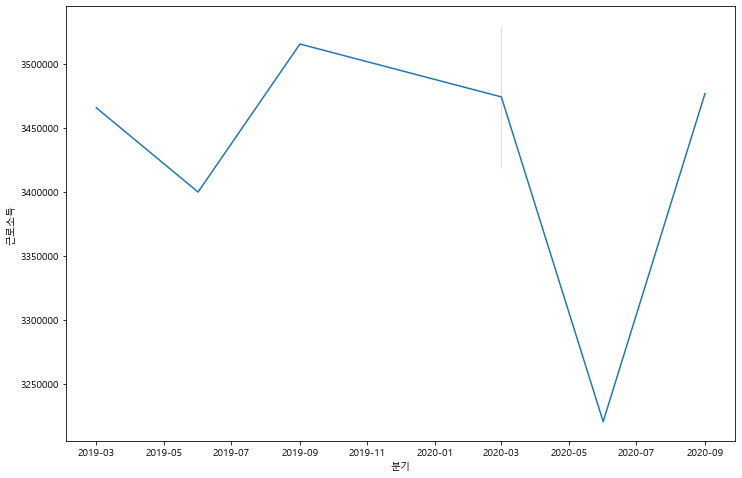

In [366]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='분기', y='근로소득')

- 본격적으로 COVID-19 확진자가 급상승한 2020-03 이후 근로소득이 급격하게 낮아진것을 확인

In [368]:
df['평균소비성향']=df['평균소비성향'].astype(float)

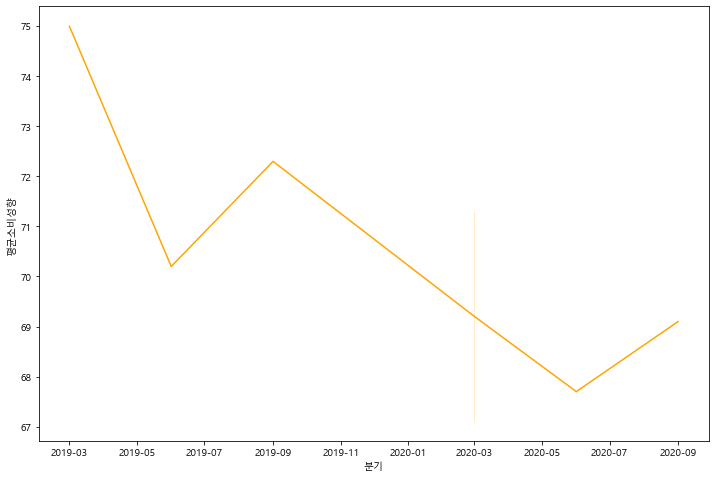

In [432]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='분기', y='평균소비성향', color="orange")

- 근로소득이 낮아지고 COVID-19가 심화되는 과정에서 국민들의 가구 평균소비성향이 급격하게 하락한것을 확인

In [405]:
pie_df = df[['분기','01.식료품 · 비주류음료', '02.주류 · 담배', '03.의류 · 신발', '04.주거 · 수도 · 광열', '05.가정용품 · 가사서비스',
   '06.보건', '07.교통', '08.통신', '09.오락 · 문화', '10.교육', '11.음식 · 숙박', '12.기타상품 · 서비스']]

In [406]:
pie_df

,분기,01.식료품 · 비주류음료,02.주류 · 담배,03.의류 · 신발,04.주거 · 수도 · 광열,05.가정용품 · 가사서비스,06.보건,07.교통,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스
0,2019-03-01,403093,37599,165318,344711,149520,247800,328008,143944,243162,358438,393718,245524
1,2019-06-01,378435,36955,179398,279513,148658,235163,307864,150251,220143,238535,408270,252244
2,2019-09-01,420222,38820,137115,263084,135851,228023,383895,152177,229064,341887,419005,237165
3,2020-03-01,407853,35372,196410,283136,137424,249302,373946,158385,191314,218862,406624,249574
4,2020-03-01,445304,36028,119074,338550,132189,272332,342062,144606,180885,264068,349689,253127
5,2020-06-01,454322,40463,169021,298731,180407,252899,383725,145104,173985,168431,387847,256779
6,2020-09-01,498778,42980,118402,280694,162777,257251,336185,154056,164679,295327,391510,242244


In [424]:
pie_2020_09 = pie_df.iloc[3]

In [425]:
pie_2020_09 = pd.DataFrame(pie_2020_09)

In [426]:
pie_2020_09 = pie_2020_09[1:]

In [427]:
pie_2020_09

,3
0,
01.식료품 · 비주류음료,407853
02.주류 · 담배,35372
03.의류 · 신발,196410
04.주거 · 수도 · 광열,283136
05.가정용품 · 가사서비스,137424
06.보건,249302
07.교통,373946
08.통신,158385
09.오락 · 문화,191314


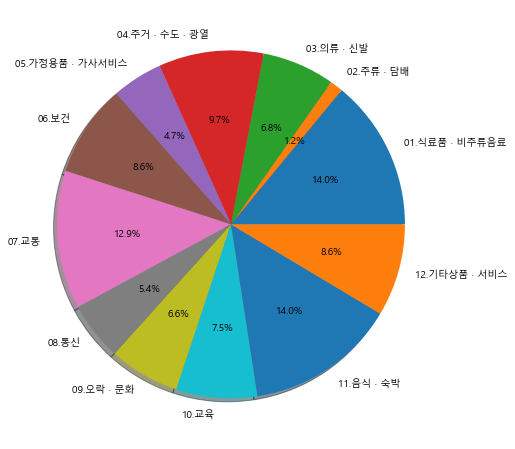

In [428]:
import matplotlib.pyplot as plt

labels = pie_2020_09.index
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']


plt.figure(figsize=(8,8))
plt.pie(pie_2020_09, labels=labels, autopct='%.1f%%', shadow=True)
plt.show()

- 소비 지출 중 교율육에 10%가 소비됨